In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv')

df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
#merge the columns

df["sms"] = df.iloc[:, 1:4].astype("str").agg(' '.join, axis=1)
df["label"] = df.iloc[:, 0]

#replace nan values with empty string
df["sms"] = df["sms"].replace("nan", "", regex=True)

df = df[["sms", "label"]]
df.head(5)

,sms,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [4]:
X = df["sms"].transform(str.lower)
y = df["label"]

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() #Ricordati che bisogna codificare le etichette in numeri!

y = le.fit_transform(y)

y[:5]

array([0, 0, 1, 0, 0])

In [6]:
from sklearn.model_selection import train_test_split

#split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
#implement tf-idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, encoding='utf-8', decode_error='ignore', stop_words='english')

X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

tfidf.get_feature_names_out()

array(['00', '000', '000pes', ..., 'ûïharry', 'ûò', 'ûówell'],
      shape=(7524,), dtype=object)

C:\Users\gabri\AppData\Local\Temp\ipykernel_80248\1476727537.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y_train, palette="Set2")


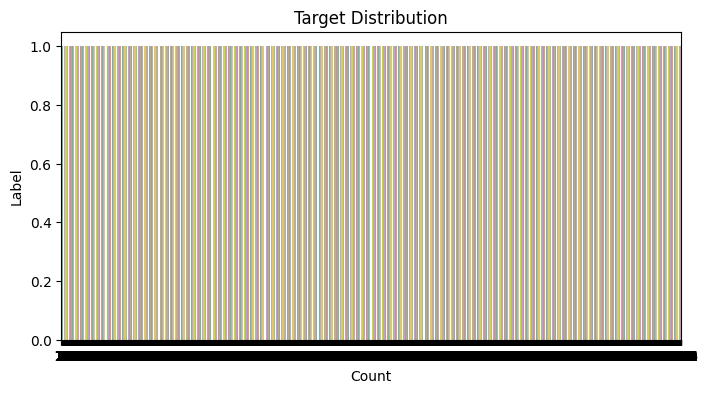

In [8]:
#plot target distribution

import matplotlib.pyplot as plt

import seaborn as sns

plt.figure(figsize=(8, 4))
sns.countplot(y_train, palette="Set2")
plt.title("Target Distribution")
plt.xlabel("Count")
plt.ylabel("Label")
plt.show()

In [9]:
#implement naive bayes classifier

from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.pipeline import make_pipeline
import numpy as np

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

#grid search for alpha iperparameter
from sklearn.model_selection import GridSearchCV

mnb = GridSearchCV(MultinomialNB(), 
                   param_grid={
                       "alpha": np.arange(0.25, 0.35, 0.1)
                   }, 
                   cv=5)

#Multinomial Naive Bayes

mnb.fit(X_train, y_train)
print("Best parameters found:")
print(mnb.best_params_)

y_pred = mnb.predict(X_test)
print("Multinomial Naive Bayes")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))


y_pred[:10]


Best parameters found:
{'alpha': np.float64(0.25)}
Multinomial Naive Bayes
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       979
           1       1.00      0.91      0.95       136

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115

Confusion Matrix:
[[979   0]
 [ 12 124]]
Accuracy Score:
0.989237668161435


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

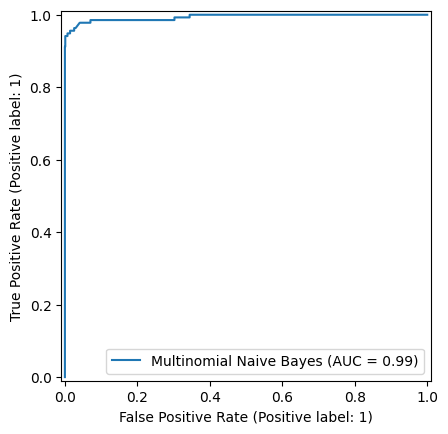

In [10]:
RocCurveDisplay.from_estimator(mnb, X_test, y_test, name="Multinomial Naive Bayes")
plt.show()

In [11]:
#Bernoulli Naive Bayes
bnb = BernoulliNB()

bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)

print("Bernoulli Naive Bayes")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Bernoulli Naive Bayes
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       979
           1       1.00      0.84      0.91       136

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
[[979   0]
 [ 22 114]]
Accuracy Score:
0.9802690582959641


In [12]:
#Gaussian Naive Bayes
gnb = GaussianNB()

gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Gaussian Naive Bayes")

print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))


Gaussian Naive Bayes
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       979
           1       0.51      0.93      0.66       136

    accuracy                           0.88      1115
   macro avg       0.75      0.90      0.79      1115
weighted avg       0.93      0.88      0.90      1115

Confusion Matrix:
[[857 122]
 [  9 127]]
Accuracy Score:
0.8825112107623319


In [15]:
spam_emails = ["You won an IPhone15!","Hey sexy, would you like to flirt with me?","I want to fuck you all the time."]
non_spam_emails = ["Have you seen my message?","Please that's urgent, send me the invoice asap!","Please help me solve the problem."]

#predict spam or non spam emails
emails = pd.Series(spam_emails + non_spam_emails)
emails = tfidf.transform(emails)
predictions = mnb.predict(emails)

le.inverse_transform(predictions)

array(['spam', 'ham', 'ham', 'ham', 'spam', 'ham'], dtype=object)

In [17]:
spam_sms = pd.Series(["Sex Sex Sex","Test test test","Special promotion for u, text +011225446 to reedem!"])

spam_sms = tfidf.transform(spam_sms)

predictions = mnb.predict(spam_sms)

le.inverse_transform(predictions)

array(['spam', 'ham', 'ham'], dtype=object)